# Imports

In [1]:
import numpy as np

from genome import Genome
from player import Player
from population import Population
from train import play_game

# Setup

In [2]:
history = []

# Genome Testing

## Genomes

Initializing genome1
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 0, []




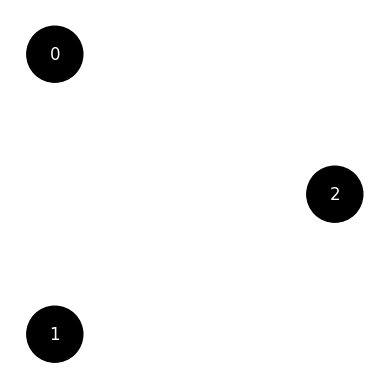

In [3]:
print("Initializing genome1")
genome1 = Genome(1, 1)
genome1.print_state()
genome1.draw_state()

General mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 1, [Gene(Node(1,L=0)->Node(2,L=1),W=-0.2753,I=0,E=1)]
	History: [History(1->2,I=0,L=[])]

	Mutations
	Connections: [Gene(Node(1,L=0)->Node(2,L=1),W=-0.2753,I=0,E=1)]




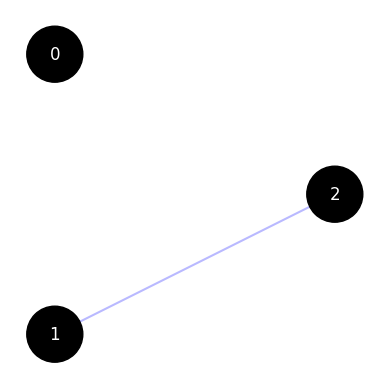

In [4]:
print("General mutation")
nodes, connections = genome1.mutate_genome(history)
genome1.print_state(history=history, nodes=nodes, connections=connections)
genome1.draw_state()

Node mutation
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 4, [Gene(Node(1,L=0)->Node(2,L=2),W=-0.2753,I=0,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=1,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.2753,I=2,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=3,E=1)]
	History: [History(1->2,I=0,L=[]), History(1->3,I=1,L=[0]), History(3->2,I=2,L=[0, 1]), History(0->3,I=3,L=[0, 1, 2])]

	Mutations
	Nodes: [Node(3,L=1)]
	Connections: [Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=1,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.2753,I=2,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=3,E=1)]




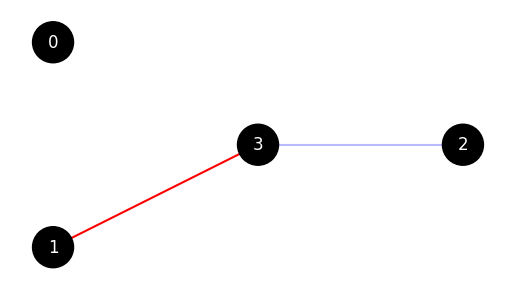

In [5]:
print("Node mutation")
nodes, connections = genome1.mutate_node(history)
genome1.print_state(history=history, nodes=nodes, connections=connections)
genome1.draw_state()

Gene mutation
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(1,L=0)->Node(2,L=2),W=-0.2753,I=0,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=1,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.2753,I=2,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=3,E=1), Gene(Node(0,L=0)->Node(2,L=2),W=0.4712,I=4,E=1)]
	History: [History(1->2,I=0,L=[]), History(1->3,I=1,L=[0]), History(3->2,I=2,L=[0, 1]), History(0->3,I=3,L=[0, 1, 2]), History(0->2,I=4,L=[0, 1, 2, 3])]

	Mutations
	Connections: [Gene(Node(0,L=0)->Node(2,L=2),W=0.4712,I=4,E=1)]




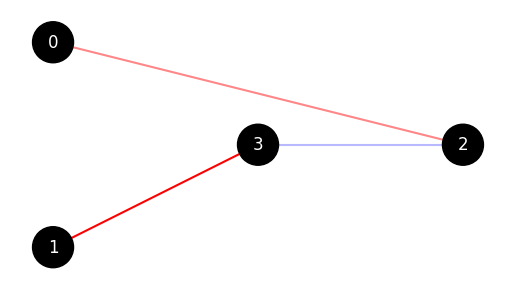

In [6]:
print("Gene mutation")
connection = genome1.mutate_connection(history)
genome1.print_state(history=history, connections=[connection])
genome1.draw_state()

Node mutation
	State
	Nodes: 5 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 8, [Gene(Node(1,L=0)->Node(2,L=3),W=-0.2753,I=0,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=1,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=-0.2753,I=2,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=3,E=1), Gene(Node(0,L=0)->Node(2,L=3),W=0.4712,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1)]
	History: [History(1->2,I=0,L=[]), History(1->3,I=1,L=[0]), History(3->2,I=2,L=[0, 1]), History(0->3,I=3,L=[0, 1, 2]), History(0->2,I=4,L=[0, 1, 2, 3]), History(1->4,I=5,L=[0, 1, 2, 3, 4]), History(4->3,I=6,L=[0, 1, 2, 3, 4, 5]), History(0->4,I=7,L=[0, 1, 2, 3, 4, 5, 6])]

	Mutations
	Nodes: [Node(4,L=1)]
	Connections: [Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1

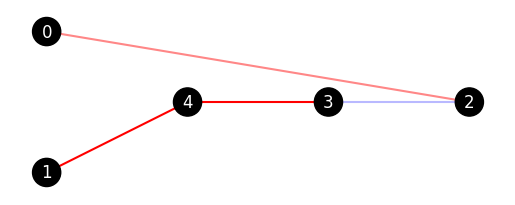

In [7]:
print("Node mutation")
nodes, connections = genome1.mutate_node(history)
genome1.print_state(history=history, nodes=nodes, connections=connections)
genome1.draw_state()

Initializing genome2
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 0, []
	History: [History(1->2,I=0,L=[]), History(1->3,I=1,L=[0]), History(3->2,I=2,L=[0, 1]), History(0->3,I=3,L=[0, 1, 2]), History(0->2,I=4,L=[0, 1, 2, 3]), History(1->4,I=5,L=[0, 1, 2, 3, 4]), History(4->3,I=6,L=[0, 1, 2, 3, 4, 5]), History(0->4,I=7,L=[0, 1, 2, 3, 4, 5, 6])]




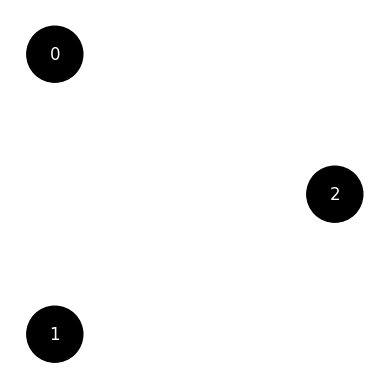

In [8]:
print("Initializing genome2")
genome2 = Genome(1, 1)
genome2.print_state(history=history)
genome2.draw_state()

General mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 1, [Gene(Node(0,L=0)->Node(2,L=1),W=-0.6204,I=8,E=1)]
	History: [History(1->2,I=0,L=[]), History(1->3,I=1,L=[0]), History(3->2,I=2,L=[0, 1]), History(0->3,I=3,L=[0, 1, 2]), History(0->2,I=4,L=[0, 1, 2, 3]), History(1->4,I=5,L=[0, 1, 2, 3, 4]), History(4->3,I=6,L=[0, 1, 2, 3, 4, 5]), History(0->4,I=7,L=[0, 1, 2, 3, 4, 5, 6]), History(0->2,I=8,L=[])]

	Mutations
	Connections: [Gene(Node(0,L=0)->Node(2,L=1),W=-0.6204,I=8,E=1)]




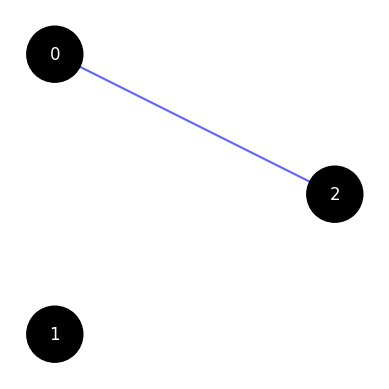

In [9]:
print("General mutation")
nodes, connections = genome2.mutate_genome(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

Node mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 1, [Gene(Node(0,L=0)->Node(2,L=1),W=-0.6204,I=8,E=1)]
	History: [History(1->2,I=0,L=[]), History(1->3,I=1,L=[0]), History(3->2,I=2,L=[0, 1]), History(0->3,I=3,L=[0, 1, 2]), History(0->2,I=4,L=[0, 1, 2, 3]), History(1->4,I=5,L=[0, 1, 2, 3, 4]), History(4->3,I=6,L=[0, 1, 2, 3, 4, 5]), History(0->4,I=7,L=[0, 1, 2, 3, 4, 5, 6]), History(0->2,I=8,L=[])]




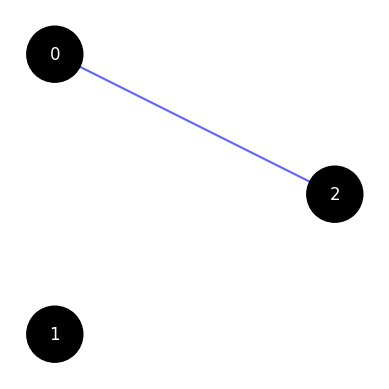

In [10]:
print("Node mutation")
nodes, connections = genome2.mutate_node(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

Gene mutation
	State
	Nodes: 3 (2), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(2,L=1)]}
	Connections: 2, [Gene(Node(0,L=0)->Node(2,L=1),W=-0.6204,I=8,E=1), Gene(Node(1,L=0)->Node(2,L=1),W=-0.4842,I=9,E=1)]
	History: [History(1->2,I=0,L=[]), History(1->3,I=1,L=[0]), History(3->2,I=2,L=[0, 1]), History(0->3,I=3,L=[0, 1, 2]), History(0->2,I=4,L=[0, 1, 2, 3]), History(1->4,I=5,L=[0, 1, 2, 3, 4]), History(4->3,I=6,L=[0, 1, 2, 3, 4, 5]), History(0->4,I=7,L=[0, 1, 2, 3, 4, 5, 6]), History(0->2,I=8,L=[]), History(1->2,I=9,L=[8])]

	Mutations
	Connections: [Gene(Node(1,L=0)->Node(2,L=1),W=-0.4842,I=9,E=1)]




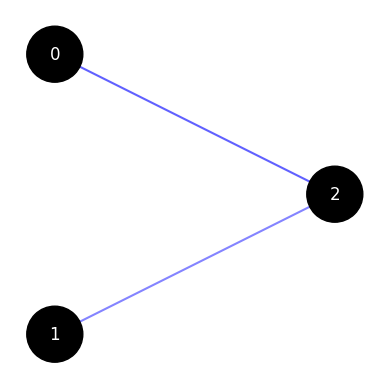

In [11]:
print("Gene mutation")
connection = genome2.mutate_connection(history)
genome2.print_state(history=history, connections=[connection])
genome2.draw_state()

Node mutation
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.6204,I=8,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.4842,I=9,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=10,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.4842,I=11,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=12,E=1)]
	History: [History(1->2,I=0,L=[]), History(1->3,I=1,L=[0]), History(3->2,I=2,L=[0, 1]), History(0->3,I=3,L=[0, 1, 2]), History(0->2,I=4,L=[0, 1, 2, 3]), History(1->4,I=5,L=[0, 1, 2, 3, 4]), History(4->3,I=6,L=[0, 1, 2, 3, 4, 5]), History(0->4,I=7,L=[0, 1, 2, 3, 4, 5, 6]), History(0->2,I=8,L=[]), History(1->2,I=9,L=[8]), History(1->3,I=10,L=[8, 9]), History(3->2,I=11,L=[8, 9, 10]), History(0->3,I=12,L=[8, 9, 10, 11])]

	Mutations
	Nodes: [Node(3,L=1)]
	Connections: [Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=10,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.4842,I=11,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=12,E=1)]




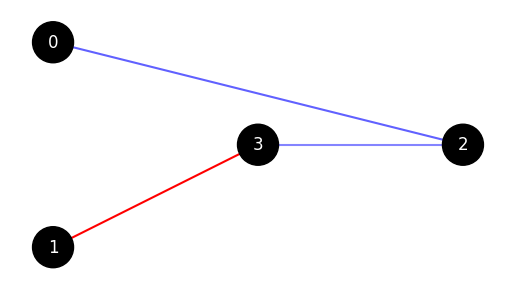

In [12]:
print("Node mutation")
nodes, connections = genome2.mutate_node(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

Gene mutation
	State
	Nodes: 4 (3), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(3,L=1)], 2: [Node(2,L=2)]}
	Connections: 5, [Gene(Node(0,L=0)->Node(2,L=2),W=-0.6204,I=8,E=1), Gene(Node(1,L=0)->Node(2,L=2),W=-0.4842,I=9,E=0), Gene(Node(1,L=0)->Node(3,L=1),W=1.0000,I=10,E=1), Gene(Node(3,L=1)->Node(2,L=2),W=-0.4842,I=11,E=1), Gene(Node(0,L=0)->Node(3,L=1),W=0.0000,I=12,E=1)]
	History: [History(1->2,I=0,L=[]), History(1->3,I=1,L=[0]), History(3->2,I=2,L=[0, 1]), History(0->3,I=3,L=[0, 1, 2]), History(0->2,I=4,L=[0, 1, 2, 3]), History(1->4,I=5,L=[0, 1, 2, 3, 4]), History(4->3,I=6,L=[0, 1, 2, 3, 4, 5]), History(0->4,I=7,L=[0, 1, 2, 3, 4, 5, 6]), History(0->2,I=8,L=[]), History(1->2,I=9,L=[8]), History(1->3,I=10,L=[8, 9]), History(3->2,I=11,L=[8, 9, 10]), History(0->3,I=12,L=[8, 9, 10, 11])]

	Mutations
	Connections: [None]




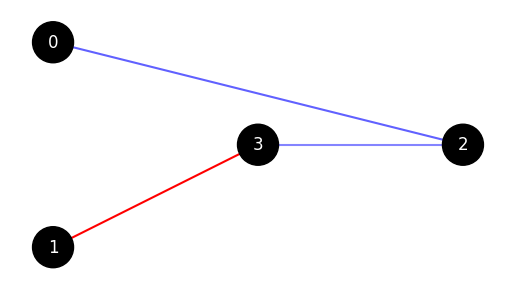

In [13]:
print("Gene mutation")
connection = genome2.mutate_connection(history)
genome2.print_state(history=history, connections=[connection])
genome2.draw_state()

Node mutation
	State
	Nodes: 5 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 8, [Gene(Node(0,L=0)->Node(2,L=3),W=-0.6204,I=8,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=-0.4842,I=9,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=10,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=-0.4842,I=11,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=13,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=14,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=15,E=1)]
	History: [History(1->2,I=0,L=[]), History(1->3,I=1,L=[0]), History(3->2,I=2,L=[0, 1]), History(0->3,I=3,L=[0, 1, 2]), History(0->2,I=4,L=[0, 1, 2, 3]), History(1->4,I=5,L=[0, 1, 2, 3, 4]), History(4->3,I=6,L=[0, 1, 2, 3, 4, 5]), History(0->4,I=7,L=[0, 1, 2, 3, 4, 5, 6]), History(0->2,I=8,L=[]), History(1->2,I=9,L=[8]), History(1->3,I=10,L=[8, 9]), History(3->2,I=11,L=[8, 9, 10]), History(0->3,I=12,L=[8, 9, 10, 11]), History(1->4,I=13,L=[8, 9, 10, 11, 12]

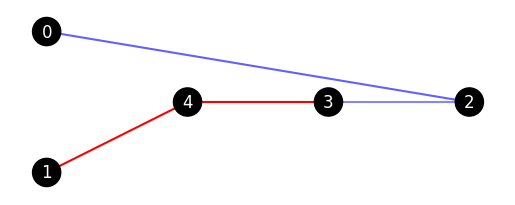

In [14]:
print("Node mutation")
nodes, connections = genome2.mutate_node(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

Gene mutation
	State
	Nodes: 5 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 9, [Gene(Node(0,L=0)->Node(2,L=3),W=-0.6204,I=8,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=-0.4842,I=9,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=10,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=-0.4842,I=11,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=13,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=14,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=15,E=1), Gene(Node(4,L=1)->Node(2,L=3),W=-0.3147,I=16,E=1)]
	History: [History(1->2,I=0,L=[]), History(1->3,I=1,L=[0]), History(3->2,I=2,L=[0, 1]), History(0->3,I=3,L=[0, 1, 2]), History(0->2,I=4,L=[0, 1, 2, 3]), History(1->4,I=5,L=[0, 1, 2, 3, 4]), History(4->3,I=6,L=[0, 1, 2, 3, 4, 5]), History(0->4,I=7,L=[0, 1, 2, 3, 4, 5, 6]), History(0->2,I=8,L=[]), History(1->2,I=9,L=[8]), History(1->3,I=10,L=[8, 9]), History(3->2,I=11,L=[8, 9, 10]), History(0->3,I=12,L=[8, 

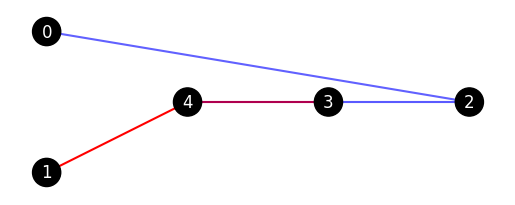

In [15]:
print("Gene mutation")
connection = genome2.mutate_connection(history)
genome2.print_state(history=history, connections=[connection])
genome2.draw_state()

Node mutation
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1), Node(5,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 12, [Gene(Node(0,L=0)->Node(2,L=3),W=-0.6204,I=8,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=-0.4842,I=9,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=10,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=-0.4842,I=11,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=13,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=14,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=15,E=1), Gene(Node(4,L=1)->Node(2,L=3),W=-0.3147,I=16,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=17,E=1), Gene(Node(5,L=1)->Node(3,L=2),W=1.0000,I=18,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=19,E=1)]
	History: [History(1->2,I=0,L=[]), History(1->3,I=1,L=[0]), History(3->2,I=2,L=[0, 1]), History(0->3,I=3,L=[0, 1, 2]), History(0->2,I=4,L=[0, 1, 2, 3]), History(1->4,I=5,L=[0, 1, 2, 3, 4]), History(4->3,I=6,L=[0, 1, 2, 3, 4, 5]), History(0->4,I

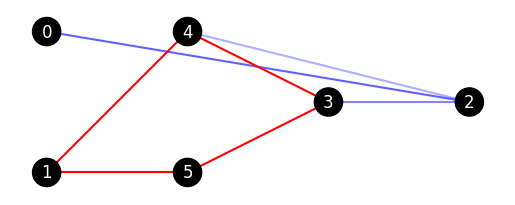

In [16]:
print("Node mutation")
nodes, connections = genome2.mutate_node(history)
genome2.print_state(history=history, nodes=nodes, connections=connections)
genome2.draw_state()

## Crossover

genome1
	State
	Nodes: 5 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 8, [Gene(Node(1,L=0)->Node(2,L=3),W=-0.2753,I=0,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=1,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=-0.2753,I=2,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=3,E=1), Gene(Node(0,L=0)->Node(2,L=3),W=0.4712,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1)]




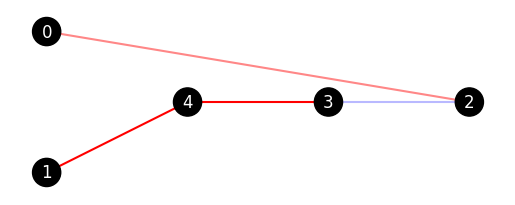

In [17]:
print("genome1")
genome1.print_state()
genome1.draw_state()

genome2
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1), Node(5,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 12, [Gene(Node(0,L=0)->Node(2,L=3),W=-0.6204,I=8,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=-0.4842,I=9,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=10,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=-0.4842,I=11,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=13,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=14,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=15,E=1), Gene(Node(4,L=1)->Node(2,L=3),W=-0.3147,I=16,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=17,E=1), Gene(Node(5,L=1)->Node(3,L=2),W=1.0000,I=18,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=19,E=1)]




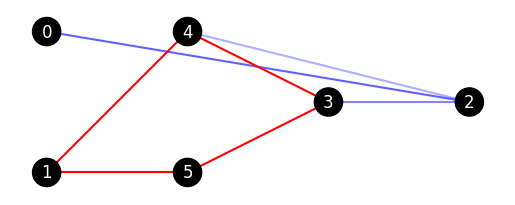

In [18]:
print("genome2")
genome2.print_state()
genome2.draw_state()

Crossover genome1 with genome 2 to create genome3
	State
	Nodes: 5 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 8, [Gene(Node(1,L=0)->Node(2,L=3),W=-0.2753,I=0,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=1,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=-0.2753,I=2,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=3,E=1), Gene(Node(0,L=0)->Node(2,L=3),W=0.4712,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1)]




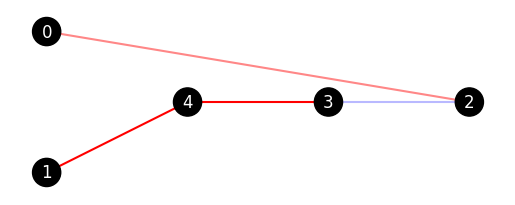

In [19]:
print("Crossover genome1 with genome 2 to create genome3")
genome3 = genome1.crossover(genome2)
genome3.print_state()
genome3.draw_state()

Crossover genome2 with genome 1 to create genome4
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1), Node(5,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 12, [Gene(Node(0,L=0)->Node(2,L=3),W=-0.6204,I=8,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=-0.4842,I=9,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=10,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=-0.4842,I=11,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=13,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=14,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=15,E=1), Gene(Node(4,L=1)->Node(2,L=3),W=-0.3147,I=16,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=17,E=1), Gene(Node(5,L=1)->Node(3,L=2),W=1.0000,I=18,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=19,E=1)]




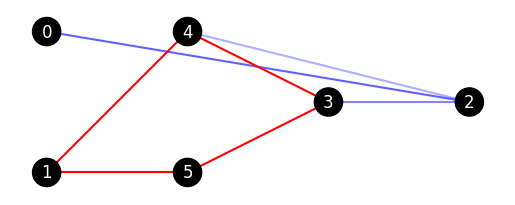

In [20]:
print("Crossover genome2 with genome 1 to create genome4")
genome4 = genome2.crossover(genome1)
genome4.print_state()
genome4.draw_state()

## Cloning

Clone genome1 to create genome5
	State
	Nodes: 5 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 8, [Gene(Node(1,L=0)->Node(2,L=3),W=-0.2753,I=0,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=1,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=-0.2753,I=2,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=3,E=1), Gene(Node(0,L=0)->Node(2,L=3),W=0.4712,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1)]




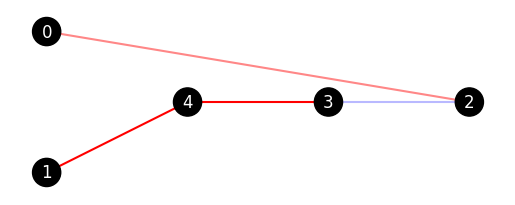

In [21]:
print("Clone genome1 to create genome5")
genome5 = genome1.clone()
genome5.print_state()
genome5.draw_state()

Clone genome2 to create genome6
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1), Node(5,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 12, [Gene(Node(0,L=0)->Node(2,L=3),W=-0.6204,I=8,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=-0.4842,I=9,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=10,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=-0.4842,I=11,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=13,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=14,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=15,E=1), Gene(Node(4,L=1)->Node(2,L=3),W=-0.3147,I=16,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=17,E=1), Gene(Node(5,L=1)->Node(3,L=2),W=1.0000,I=18,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=19,E=1)]




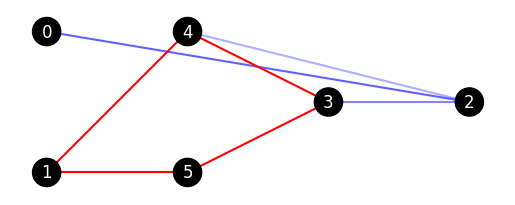

In [22]:
print("Clone genome2 to create genome6")
genome6 = genome2.clone()
genome6.print_state()
genome6.draw_state()

## Propagation

genome1
	State
	Nodes: 5 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 8, [Gene(Node(1,L=0)->Node(2,L=3),W=-0.2753,I=0,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=1,E=0), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=3,E=1), Gene(Node(0,L=0)->Node(2,L=3),W=0.4712,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(3,L=2)->Node(2,L=3),W=-0.2753,I=2,E=1)]


[0.5826271836020304]


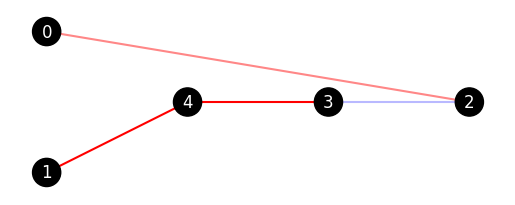

In [23]:
print("genome1")
out1 = genome1.forward_pass([1, 0.5])
genome1.print_state()
genome1.draw_state()
print(out1)

genome2
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1), Node(5,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 12, [Gene(Node(0,L=0)->Node(2,L=3),W=-0.6204,I=8,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=-0.4842,I=9,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=10,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=-0.4842,I=11,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=13,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=14,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=15,E=1), Gene(Node(4,L=1)->Node(2,L=3),W=-0.3147,I=16,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=17,E=1), Gene(Node(5,L=1)->Node(3,L=2),W=1.0000,I=18,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=19,E=1)]


[0.22062351514230874]


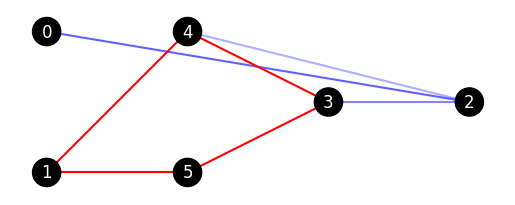

In [24]:
print("genome2")
genome2.print_state()
genome2.draw_state()
out2 = genome2.forward_pass([1, 0.5])
print(out2)

genome3
	State
	Nodes: 5 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 8, [Gene(Node(1,L=0)->Node(2,L=3),W=-0.2753,I=0,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=1,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=-0.2753,I=2,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=3,E=1), Gene(Node(0,L=0)->Node(2,L=3),W=0.4712,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1)]


[0.5826271836020304]


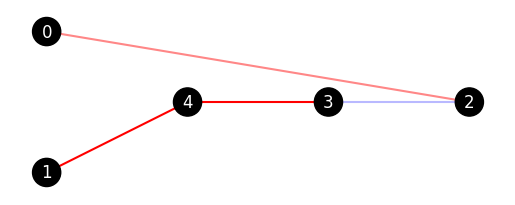

In [25]:
print("genome3")
genome3.print_state()
genome3.draw_state()
out3 = genome3.forward_pass([1, 0.5])
print(out3)

genome4
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1), Node(5,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 12, [Gene(Node(0,L=0)->Node(2,L=3),W=-0.6204,I=8,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=-0.4842,I=9,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=10,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=-0.4842,I=11,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=13,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=14,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=15,E=1), Gene(Node(4,L=1)->Node(2,L=3),W=-0.3147,I=16,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=17,E=1), Gene(Node(5,L=1)->Node(3,L=2),W=1.0000,I=18,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=19,E=1)]


[0.22062351514230874]


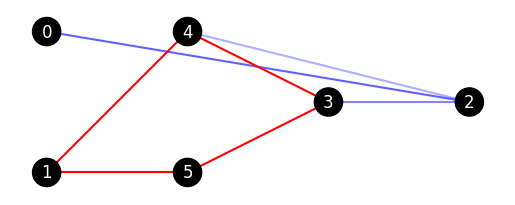

In [26]:
print("genome4")
genome4.print_state()
genome4.draw_state()
out4 = genome4.forward_pass([1, 0.5])
print(out4)

genome5
	State
	Nodes: 5 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 8, [Gene(Node(1,L=0)->Node(2,L=3),W=-0.2753,I=0,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=1,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=-0.2753,I=2,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=3,E=1), Gene(Node(0,L=0)->Node(2,L=3),W=0.4712,I=4,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=5,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=6,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=7,E=1)]


[0.5826271836020304]


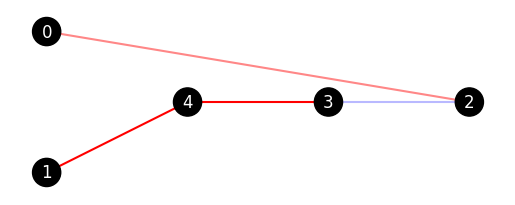

In [27]:
print("genome5")
genome5.print_state()
genome5.draw_state()
out5 = genome5.forward_pass([1, 0.5])
print(out5)

genome6
	State
	Nodes: 6 (4), {0: [Node(0,L=0), Node(1,L=0)], 1: [Node(4,L=1), Node(5,L=1)], 2: [Node(3,L=2)], 3: [Node(2,L=3)]}
	Connections: 12, [Gene(Node(0,L=0)->Node(2,L=3),W=-0.6204,I=8,E=1), Gene(Node(1,L=0)->Node(2,L=3),W=-0.4842,I=9,E=0), Gene(Node(1,L=0)->Node(3,L=2),W=1.0000,I=10,E=0), Gene(Node(3,L=2)->Node(2,L=3),W=-0.4842,I=11,E=1), Gene(Node(0,L=0)->Node(3,L=2),W=0.0000,I=12,E=1), Gene(Node(1,L=0)->Node(4,L=1),W=1.0000,I=13,E=1), Gene(Node(4,L=1)->Node(3,L=2),W=1.0000,I=14,E=1), Gene(Node(0,L=0)->Node(4,L=1),W=0.0000,I=15,E=1), Gene(Node(4,L=1)->Node(2,L=3),W=-0.3147,I=16,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=1.0000,I=17,E=1), Gene(Node(5,L=1)->Node(3,L=2),W=1.0000,I=18,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=19,E=1)]


[0.22062351514230874]


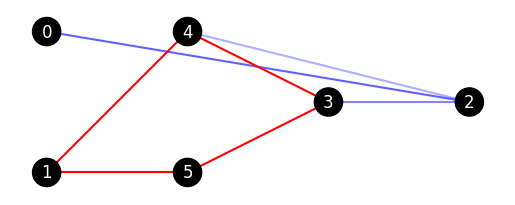

In [28]:
print("genome6")
genome6.print_state()
genome6.draw_state()
out6 = genome6.forward_pass([1, 0.5])
print(out6)

# Player Testing

	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 0, []




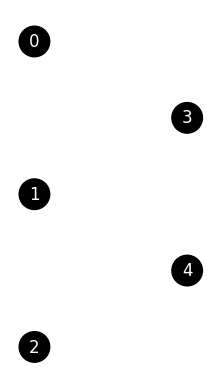

In [29]:
history = []

player = Player(2, 2)
player.nn.print_state()
player.nn.draw_state()

	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(0,L=0)->Node(4,L=1),W=0.8737,I=0,E=1)]




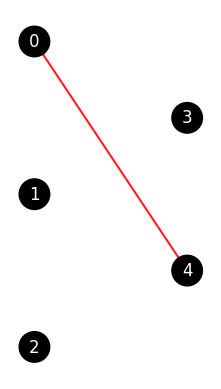

In [30]:
player.mutate(history)
player.nn.print_state()
player.nn.draw_state()

In [31]:
inputs = [1] + np.random.randint(2, size=2).tolist()
decision = player.decide(inputs)
print(inputs, player.nn.forward_pass(inputs), decision)

[1, 0, 1] [0.5, 0.7055206218536106] 1


# Population Testing

In [32]:
population = Population(1000, 2, 2)
players = population.new_generation()
won = play_game(players)
for i in range(len(players)):
    players[i].fitness = won[i]
population.update_generation()
print("Innovation History: %s" % population.innovation_history)
print("Number of Species: %d" % len(population.species))
for i in range(len(population.species)):
    print("Species %d - Players: %d, Average Fitness: %.4f" % (i, len(population.species[i].players), population.species[i].average_fitness))

Innovation History: [History(1->3,I=0,L=[]), History(0->3,I=1,L=[]), History(0->4,I=2,L=[]), History(1->4,I=3,L=[]), History(2->4,I=4,L=[]), History(2->3,I=5,L=[]), History(2->5,I=6,L=[5]), History(5->3,I=7,L=[5, 6]), History(0->5,I=8,L=[5, 6, 7]), History(1->5,I=9,L=[0]), History(5->3,I=10,L=[0, 9]), History(0->5,I=11,L=[0, 9, 10]), History(2->5,I=12,L=[4]), History(5->4,I=13,L=[4, 12]), History(0->5,I=14,L=[4, 12, 13])]
Number of Species: 9
Species 0 - Players: 82, Average Fitness: 53.0122
Species 1 - Players: 86, Average Fitness: 53.2558
Species 2 - Players: 72, Average Fitness: 53.7361
Species 3 - Players: 95, Average Fitness: 53.9368
Species 4 - Players: 83, Average Fitness: 54.0120
Species 5 - Players: 83, Average Fitness: 53.7831
Species 6 - Players: 3, Average Fitness: 54.6667
Species 7 - Players: 2, Average Fitness: 47.5000
Species 8 - Players: 1, Average Fitness: 45.0000


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(3,L=1),W=-0.3809,I=5,E=1)]


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(3,L=1),W=0.7446,I=5,E=1)]


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(3,L=1),W=-0.0080,I=5,E=1)]


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(3,L=1),W=-0.1108,I=5,E=1)]


	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(3,L=1),W=-0.4489,I=5,E=1)]




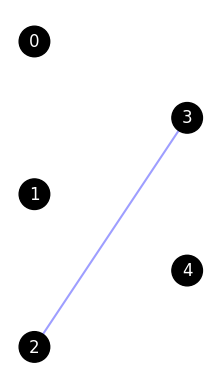

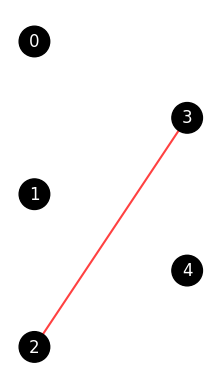

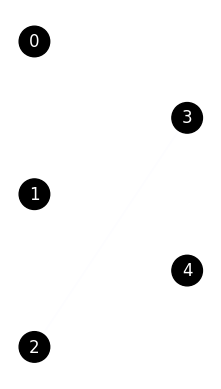

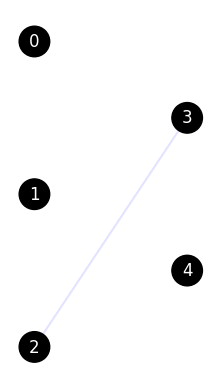

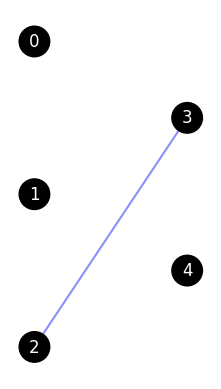

In [33]:
species = population.species[0]
for i in range(min(5, len(species.players))):
    player = species.players[i]
    player.nn.print_state()
    player.nn.draw_state()

	State
	Nodes: 5 (2), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(3,L=1), Node(4,L=1)]}
	Connections: 1, [Gene(Node(2,L=0)->Node(3,L=1),W=-0.3809,I=5,E=1)]


[1, 0, 0] [0.5, 0.5] 0 1
[1, 1, 1] [0.405907889831484, 0.5] 1 1
[1, 0, 1] [0.405907889831484, 0.5] 1 2
[1, 1, 0] [0.5, 0.5] 0 2
[1, 0, 1] [0.405907889831484, 0.5] 1 3
[1, 0, 1] [0.405907889831484, 0.5] 1 4
[1, 0, 0] [0.5, 0.5] 0 5
[1, 0, 1] [0.405907889831484, 0.5] 1 6
[1, 1, 0] [0.5, 0.5] 0 6
[1, 1, 1] [0.405907889831484, 0.5] 1 6


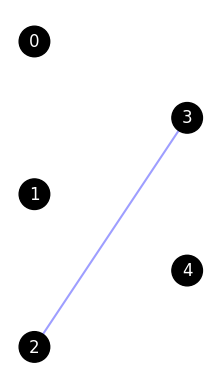

In [34]:
player = species.players[0]
player.nn.print_state()
player.nn.draw_state()

won = 0
for _ in range(10):
    inputs = [1] + np.random.randint(2, size=2).tolist()
    decision = player.decide(inputs)
    if inputs[1] == inputs[2] and decision == 0:
        won += 1
    elif inputs[1] != inputs[2] and decision == 1:
        won += 1
    print(inputs, player.nn.forward_pass(inputs), decision, won)

	State
	Nodes: 6 (3), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(5,L=1)], 2: [Node(3,L=2), Node(4,L=2)]}
	Connections: 4, [Gene(Node(2,L=0)->Node(4,L=2),W=-0.2884,I=4,E=0), Gene(Node(2,L=0)->Node(5,L=1),W=1.0000,I=12,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=14,E=1), Gene(Node(5,L=1)->Node(4,L=2),W=-0.2884,I=13,E=1)]




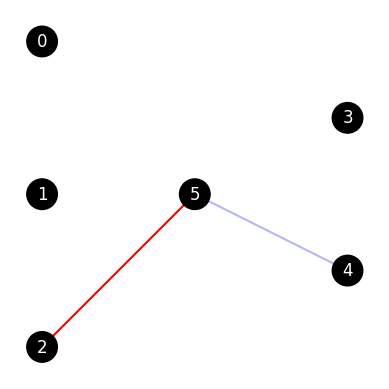

In [35]:
species = population.species[np.argmin([len(s.players) for s in population.species])]
for i in range(min(5, len(species.players))):
    player = species.players[i]
    player.nn.print_state()
    player.nn.draw_state()

	State
	Nodes: 6 (3), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(5,L=1)], 2: [Node(3,L=2), Node(4,L=2)]}
	Connections: 4, [Gene(Node(2,L=0)->Node(4,L=2),W=-0.2884,I=4,E=0), Gene(Node(2,L=0)->Node(5,L=1),W=1.0000,I=12,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=0.0000,I=14,E=1), Gene(Node(5,L=1)->Node(4,L=2),W=-0.2884,I=13,E=1)]


[1, 0, 1] [0.5, 0.4284009780573629] 0 0
[1, 0, 0] [0.5, 0.5] 0 1
[1, 0, 1] [0.5, 0.4284009780573629] 0 1
[1, 1, 1] [0.5, 0.4284009780573629] 0 2
[1, 1, 1] [0.5, 0.4284009780573629] 0 3
[1, 0, 1] [0.5, 0.4284009780573629] 0 3
[1, 1, 1] [0.5, 0.4284009780573629] 0 4
[1, 0, 0] [0.5, 0.5] 0 5
[1, 0, 1] [0.5, 0.4284009780573629] 0 5
[1, 0, 0] [0.5, 0.5] 0 6


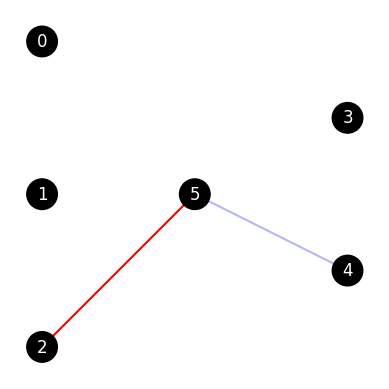

In [36]:
player = species.players[0]
player.nn.print_state()
player.nn.draw_state()

won = 0
for _ in range(10):
    inputs = [1] + np.random.randint(2, size=2).tolist()
    decision = player.decide(inputs)
    if inputs[1] == inputs[2] and decision == 0:
        won += 1
    elif inputs[1] != inputs[2] and decision == 1:
        won += 1
    print(inputs, player.nn.forward_pass(inputs), decision, won)

# Iteration Test

In [37]:
population = Population(1000, 2, 2)
players = population.new_generation()
won = play_game(players)
for i in range(len(players)):
    players[i].fitness = won[i]
population.update_generation()

print("Innovations: %s" % len(population.innovation_history))
print("Species: %d" % len(population.species))
for i in range(len(population.species)):
    print("Species %d - Players: %d, Average Fitness: %.4f, Max Fitness: %.4f" % (i, len(population.species[i].players), population.species[i].average_fitness, population.species[i].max_fitness))

Innovations: 18
Species: 10
Species 0 - Players: 78, Average Fitness: 54.6923, Max Fitness: 68.0000
Species 1 - Players: 76, Average Fitness: 53.7895, Max Fitness: 65.0000
Species 2 - Players: 82, Average Fitness: 54.3293, Max Fitness: 64.0000
Species 3 - Players: 85, Average Fitness: 53.6471, Max Fitness: 64.0000
Species 4 - Players: 88, Average Fitness: 53.6364, Max Fitness: 62.0000
Species 5 - Players: 92, Average Fitness: 53.9239, Max Fitness: 62.0000
Species 6 - Players: 2, Average Fitness: 57.0000, Max Fitness: 60.0000
Species 7 - Players: 2, Average Fitness: 52.5000, Max Fitness: 55.0000
Species 8 - Players: 1, Average Fitness: 53.0000, Max Fitness: 53.0000
Species 9 - Players: 1, Average Fitness: 45.0000, Max Fitness: 45.0000


In [38]:
players = population.new_generation()
won = play_game(players)
for i in range(len(players)):
    players[i].fitness = won[i]
population.update_generation()

print("Innovations: %s" % len(population.innovation_history))
print("Species: %d" % len(population.species))
for i in range(len(population.species)):
    print("Species %d - Players: %d, Average Fitness: %.4f, Max Fitness: %.4f" % (i, len(population.species[i].players), population.species[i].average_fitness, population.species[i].max_fitness))

Innovations: 52
Species: 10
Species 0 - Players: 51, Average Fitness: 56.3725, Max Fitness: 80.0000
Species 1 - Players: 50, Average Fitness: 55.3800, Max Fitness: 74.0000
Species 2 - Players: 52, Average Fitness: 53.4423, Max Fitness: 72.0000
Species 3 - Players: 51, Average Fitness: 54.5294, Max Fitness: 67.0000
Species 4 - Players: 51, Average Fitness: 54.4510, Max Fitness: 66.0000
Species 5 - Players: 50, Average Fitness: 53.9200, Max Fitness: 65.0000
Species 6 - Players: 43, Average Fitness: 53.7674, Max Fitness: 64.0000
Species 7 - Players: 55, Average Fitness: 53.5455, Max Fitness: 63.0000
Species 8 - Players: 51, Average Fitness: 53.0392, Max Fitness: 62.0000
Species 9 - Players: 54, Average Fitness: 52.9815, Max Fitness: 60.0000


# Training Test

In [44]:
num_iters = 100
print_step = 5
population_size = 1000
num_inputs = 2
num_outputs = 2
max_hits_threshold = 5

max_hits = 0

population = Population(population_size, num_inputs, num_outputs)

for iteration in range(num_iters):
    players = population.new_generation()
    won = play_game(players)
    for i in range(len(players)):
        players[i].fitness = won[i]
    population.update_generation()
    if iteration % print_step == 0:
        print("Iteration: %d, Innovations: %s, Species: %d, Average Fitness: %.4f, Max Fitness: %.4f" % (iteration, len(population.innovation_history), len(population.species), population.sum_average_fitness / len(population.species), population.max_fitness))
    elif population.max_fitness == 100:
        print("Iteration: %d, Innovations: %s, Species: %d, Average Fitness: %.4f, Max Fitness: %.4f" % (iteration, len(population.innovation_history), len(population.species), population.sum_average_fitness / len(population.species), population.max_fitness))
        max_hits += 1
    else:
        max_hits = 0
    if max_hits == max_hits_threshold:
        max_player = population.species[0].players[0]
        break

Iteration: 0, Innovations: 15, Species: 9, Average Fitness: 53.4374, Max Fitness: 65.0000
Iteration: 5, Innovations: 126, Species: 21, Average Fitness: 63.2692, Max Fitness: 84.0000
Iteration: 10, Innovations: 209, Species: 32, Average Fitness: 68.0135, Max Fitness: 87.0000
Iteration: 15, Innovations: 277, Species: 38, Average Fitness: 70.2386, Max Fitness: 89.0000
Iteration: 20, Innovations: 336, Species: 41, Average Fitness: 73.1413, Max Fitness: 87.0000
Iteration: 22, Innovations: 359, Species: 43, Average Fitness: 74.1783, Max Fitness: 100.0000
Iteration: 23, Innovations: 363, Species: 43, Average Fitness: 73.8771, Max Fitness: 100.0000
Iteration: 24, Innovations: 372, Species: 43, Average Fitness: 75.0930, Max Fitness: 100.0000
Iteration: 25, Innovations: 375, Species: 43, Average Fitness: 75.4208, Max Fitness: 100.0000
Iteration: 26, Innovations: 380, Species: 43, Average Fitness: 75.9536, Max Fitness: 100.0000
Iteration: 27, Innovations: 384, Species: 44, Average Fitness: 75.868

[1, 0, 0] [0.5, 0.5] 0
[1, 0, 1] [0.5, 0.5822422261697643] 1
[1, 1, 0] [0.5, 0.5149661669064443] 1
[1, 1, 1] [0.5, 0.49577481137208956] 0
	State
	Nodes: 6 (3), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(5,L=1)], 2: [Node(3,L=2), Node(4,L=2)]}
	Connections: 6, [Gene(Node(1,L=0)->Node(4,L=2),W=0.0599,I=2,E=1), Gene(Node(2,L=0)->Node(4,L=2),W=-0.1788,I=54,E=1), Gene(Node(2,L=0)->Node(5,L=1),W=0.9617,I=57,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=-0.1165,I=59,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=-0.6764,I=112,E=1), Gene(Node(5,L=1)->Node(4,L=2),W=0.6043,I=58,E=1)]




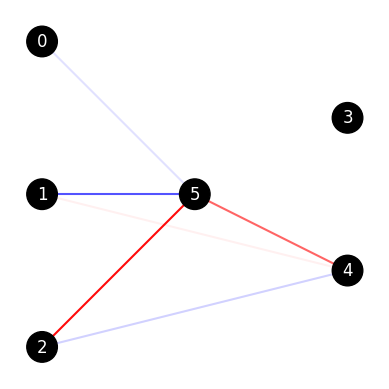

In [45]:
for i in range(4):
    inputs = [1, 0 if i < 2 else 1, 0 if i % 2 == 0 else 1]
    decision = max_player.decide(inputs)
    print(inputs, max_player.nn.forward_pass(inputs), decision)
max_player.nn.print_state()
max_player.nn.draw_state()

[1, 0, 0] [0.438041841230891, 0.7297110140834713] 1
[1, 0, 1] [0.39881520912206175, 0.75485029737241] 1
[1, 1, 0] [0.438041841230891, 0.587163381677296] 1
[1, 1, 1] [0.39881520912206175, 0.6186317427728654] 1
	State
	Nodes: 7 (4), {0: [Node(0,L=0), Node(1,L=0), Node(2,L=0)], 1: [Node(5,L=1)], 2: [Node(6,L=2)], 3: [Node(3,L=3), Node(4,L=3)]}
	Connections: 13, [Gene(Node(2,L=0)->Node(4,L=3),W=0.1315,I=5,E=1), Gene(Node(2,L=0)->Node(5,L=1),W=0.0193,I=6,E=1), Gene(Node(0,L=0)->Node(5,L=1),W=-0.5115,I=8,E=1), Gene(Node(0,L=0)->Node(4,L=3),W=0.9932,I=78,E=1), Gene(Node(1,L=0)->Node(4,L=3),W=-0.6409,I=138,E=1), Gene(Node(0,L=0)->Node(3,L=3),W=-0.2491,I=325,E=1), Gene(Node(2,L=0)->Node(3,L=3),W=-0.1613,I=346,E=1), Gene(Node(1,L=0)->Node(5,L=1),W=0.1174,I=375,E=1), Gene(Node(0,L=0)->Node(6,L=2),W=0.0000,I=382,E=1), Gene(Node(5,L=1)->Node(4,L=3),W=-0.8583,I=7,E=0), Gene(Node(5,L=1)->Node(3,L=3),W=0.3968,I=41,E=1), Gene(Node(5,L=1)->Node(6,L=2),W=1.0000,I=380,E=1), Gene(Node(6,L=2)->Node(4,L=3),W

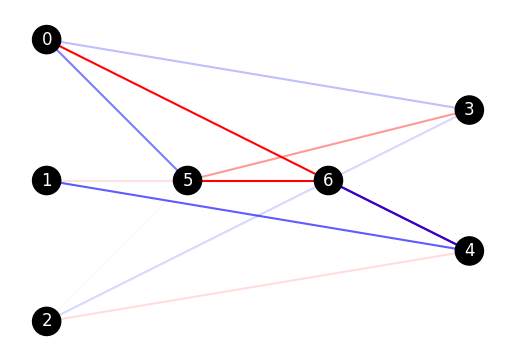

In [46]:
player = population.species[len(population.species) - 8].players[0]
for i in range(4):
    inputs = [1, 0 if i < 2 else 1, 0 if i % 2 == 0 else 1]
    decision = player.decide(inputs)
    print(inputs, player.nn.forward_pass(inputs), decision)
player.nn.print_state()
player.nn.draw_state()